# Gráficas para las mediciones realizadas con el REW

## Gráficas comparativas de SPL

#### Funciones para comparar SPL por: mediciones sin carbón activado, mediciones agrupadas según distancia y mediciones mezcladas diferenciando parte real e imaginaria

In [16]:
#Función para mediciones de SPL sin carbón activado

def graficar_comparacion_grupo(archivos, etiquetas, categorias_color, titulo, nombre_archivo=None, lim_x=None, lim_y_spl=None, lim_y_phase=None, mostrar_fase=False):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import os

    XTICKS = np.array([50, 200, 500, 1000, 2000, 5000, 10000, 20000])
    XTICK_LABELS = [str(x) if x < 1000 else f'{int(x//1000)}k' for x in XTICKS]

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax2 = ax1.twinx() if mostrar_fase else None


    for archivo, etiqueta in zip(archivos, etiquetas):
        df = pd.read_csv(
            os.path.join('rew', archivo),
            comment='*',
            sep=r'\s+',
            names=["Freq(Hz)", "SPL(dB)", "Phase(degrees)"],
            engine='python',
            skiprows=1
        )

        color = categorias_color.get(etiqueta, '#000000')  # color negro si no se encuentra
        ax1.plot(df["Freq(Hz)"], df["SPL(dB)"], label=f'SPL - {etiqueta}', color=color)
        if mostrar_fase and ax2:
            ax2.plot(df["Freq(Hz)"], df["Phase(degrees)"], linestyle='--', label=f'Fase - {etiqueta}', color=color)

    ax1.set_xscale('log')
    ax1.set_xlabel('Frecuencia [Hz]')
    ax1.set_ylabel('SPL [dB]', color='blue')
    if mostrar_fase and ax2:
        ax2.set_ylabel('Fase [Grados]', color='red')
        ax2.axhline(0, color='gray', linestyle='-', linewidth=1)
        if lim_y_phase:
            ax2.set_ylim(lim_y_phase)
        ax2.legend(loc='lower right')

    if lim_x: ax1.set_xlim(lim_x)
    if lim_y_spl: ax1.set_ylim(lim_y_spl)

    ax1.set_xticks(XTICKS)
    ax1.set_xticklabels(XTICK_LABELS)

    ax1.legend(loc='lower left')
    #ax2.legend(loc='lower right')
    plt.title(titulo)
    plt.grid(True)
    plt.tight_layout()

    # Guardar la figura si se proporciona nombre
    if nombre_archivo:
        os.makedirs('figuras', exist_ok=True) #Las figuras se guardaran en una carpeta llama "figuras", sino la encuentra la creará.
        plt.savefig(os.path.join('figuras', f'{nombre_archivo}.png'), dpi=300)

    plt.show()

In [17]:
#Función para mediciones de SPL según distancia entre parlante y micrófono a 1, 5 y 10 cm 

def graficar_comparacion_por_distancia(
    grupos_archivos, etiquetas_grupos, categorias_color, titulo_general,
    nombre_archivo=None, mostrar_fase=False, lim_x=None, lim_y_spl=None):

    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import os

    XTICKS = np.array([50, 200, 500, 1000, 2000, 5000, 10000, 20000])
    XTICK_LABELS = [str(x) if x < 1000 else f'{int(x//1000)}k' for x in XTICKS]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(titulo_general, fontsize=14)
    
    distancias = ['1cm', '5cm', '10cm']

    for idx, (archivos, etiquetas) in enumerate(zip(grupos_archivos, etiquetas_grupos)):
        ax1 = axs[idx]
        ax2 = ax1.twinx() if mostrar_fase else None

        for archivo, etiqueta in zip(archivos, etiquetas):
            df = pd.read_csv(
                os.path.join('rew', archivo),
                comment='*',
                sep=r'\s+',
                names=["Freq(Hz)", "SPL(dB)", "Phase(degrees)"],
                engine='python',
                skiprows=1
            )
            
            color = categorias_color.get(etiqueta, '#000000')
            ax1.plot(df["Freq(Hz)"], df["SPL(dB)"], label=f'SPL - {etiqueta}', color=color)

            if mostrar_fase and ax2:
                ax2.plot(df["Freq(Hz)"], df["Phase(degrees)"], linestyle='--', label=f'Fase - {etiqueta}', color=color)

        ax1.set_xscale('log')
        ax1.set_xlabel('Frecuencia [Hz]')
        ax1.set_xticks(XTICKS)
        ax1.set_xticklabels(XTICK_LABELS)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

        if lim_x:
            ax1.set_xlim(lim_x)
            if ax2:
                ax2.set_xlim(lim_x)
        if lim_y_spl: ax1.set_ylim(lim_y_spl)

        if idx == 0:
            ax1.set_ylabel('SPL [dB]')
        if mostrar_fase and ax2:
            ax2.set_ylabel('Fase [Grados]')
            ax2.axhline(0, color='gray', linestyle='--', linewidth=0.5)
            ax2.legend(loc='lower right')
        
        ax1.legend(loc='lower left')
        ax1.set_title(f'Distancia {distancias[idx]}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    if nombre_archivo:
        os.makedirs('figuras', exist_ok=True)
        plt.savefig(os.path.join('figuras', f'{nombre_archivo}.png'), dpi=300)

    plt.show()

In [18]:
#Función para mediciones de SPL, separando parte real e imaginaria

def graficar_complejo_grupo(archivos, etiquetas, categorias_color, titulo, nombre_archivo=None, lim_x=None, lim_y_real=None, lim_y_imag=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    
    XTICKS = np.array([50, 200, 500, 1000, 2000, 5000, 10000, 20000])
    XTICK_LABELS = [str(x) if x < 1000 else f'{int(x//1000)}k' for x in XTICKS]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), sharex=True)

    for archivo, etiqueta in zip(archivos, etiquetas):
        df = pd.read_csv(
            os.path.join('rew', archivo),
            comment='*',
            sep=r'\s+',
            names=["Freq(Hz)", "SPL(dB)", "Phase(degrees)"],
            engine='python',
            skiprows=1
        )

        P_REF = 20e-6  # 20 µPa
        df["Fase(rad)"] = np.deg2rad(df["Phase(degrees)"])
        df["Magnitud_P"] = P_REF * 10**(df["SPL(dB)"] / 20)
        df["Parte_real"] = df["Magnitud_P"] * np.cos(df["Fase(rad)"])
        df["Parte_imaginaria"] = df["Magnitud_P"] * np.sin(df["Fase(rad)"])


        color = categorias_color.get(etiqueta, '#000000')
        ax1.plot(df["Freq(Hz)"], df["Parte_real"], label=etiqueta, color=color)
        ax2.plot(df["Freq(Hz)"], df["Parte_imaginaria"], label=etiqueta, linestyle='--', color=color)

    # Configuración de gráficos
        for ax, ylabel, title, lim_y in zip(
            [ax1, ax2],
            ['Presión [Pa]', 'Presión [Pa]'],
            ['Componente Real de Presión', 'Componente Imaginaria de Presión'],
            [lim_y_real, lim_y_imag]
        ):
            ax.set_xscale('log')
            ax.set_xlabel('Frecuencia [Hz]')
            ax.set_ylabel(ylabel)
            ax.set_xticks(XTICKS)
            ax.set_xticklabels(XTICK_LABELS)
            if lim_x: ax.set_xlim(lim_x)
            if lim_y: ax.set_ylim(lim_y)
            ax.grid(True)
            ax.legend(loc='upper left')
            ax.set_title(title)


    plt.suptitle(titulo)
    plt.tight_layout()

    if nombre_archivo:
        os.makedirs('figuras', exist_ok=True)
        plt.savefig(os.path.join('figuras', f'{nombre_archivo}_presion_compleja.png'), dpi=300)

    plt.show()

#### Los siguientes gráficos están comparados como:
- Mediciones de SPL sin carbón activado para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con... 
  - Parlante Solo
  - Caja Acústica
  - Caja + Peltier

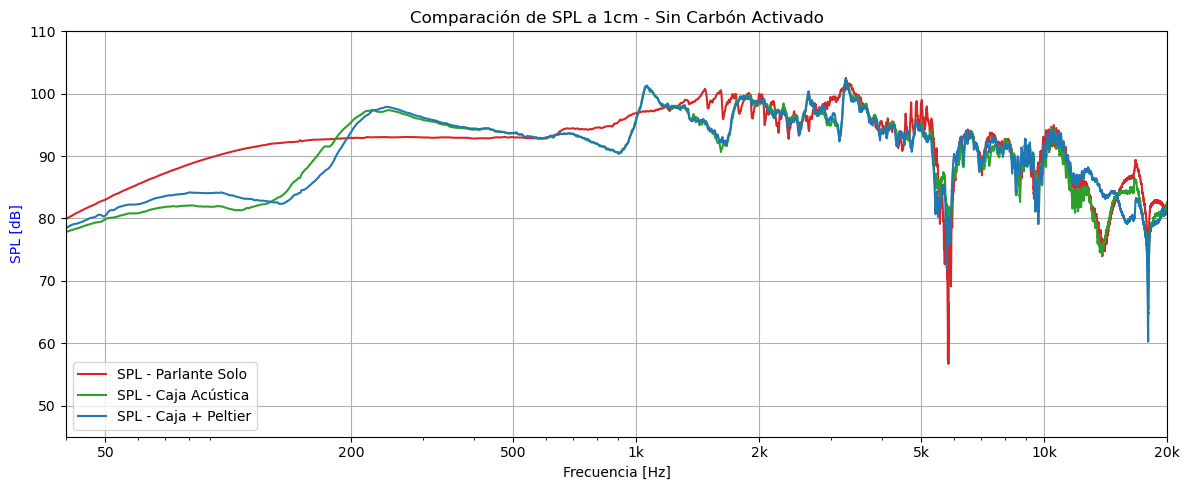

In [19]:
# Define colores por categoría
colores = {
    'Parlante Solo': '#d62728', # rojo
    'Caja Acústica': '#2ca02c',  # verde 
    'Caja + Peltier': '#1f77b4',       # celeste   
}

graficar_comparacion_grupo(
    archivos=['Parlante_Mic_1cm.txt','Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación de SPL a 1cm - Sin Carbón Activado',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(45,110),
    nombre_archivo='sin_carbon_1cm' #comentar para que no se guarde el gráfico
)

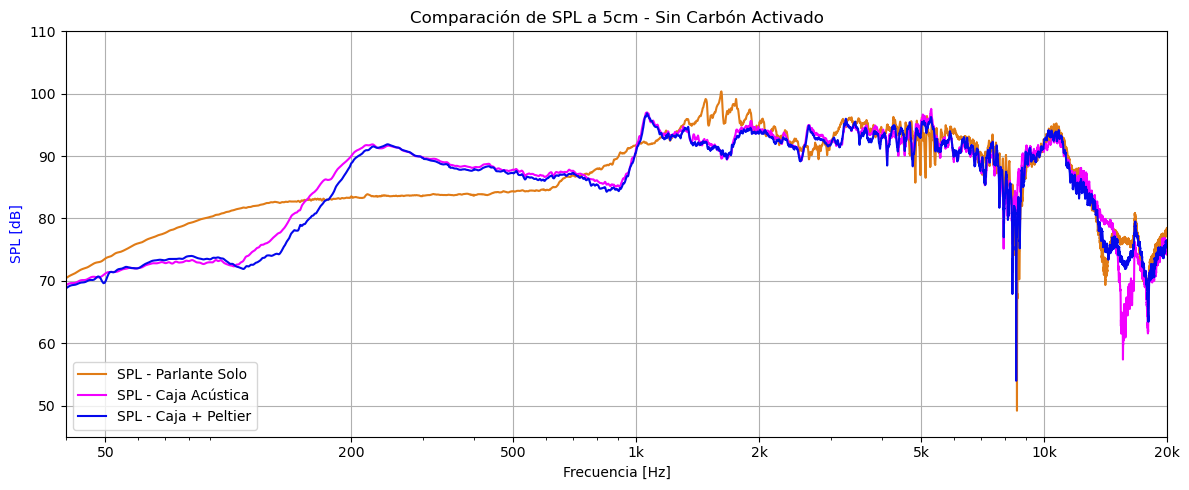

In [20]:
# Define colores por categoría
colores = {
    'Parlante Solo': "#e07b16", # naranja
    'Caja Acústica': "#f200ff",  # rosa 
    'Caja + Peltier': "#0408ec",       # azul 
}

graficar_comparacion_grupo(
    archivos=['Parlante_Mic_5cm.txt','Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación de SPL a 5cm - Sin Carbón Activado',
    lim_x=(40,20000),
    lim_y_spl=(45,110),
    nombre_archivo='sin_carbon_5cm'
)

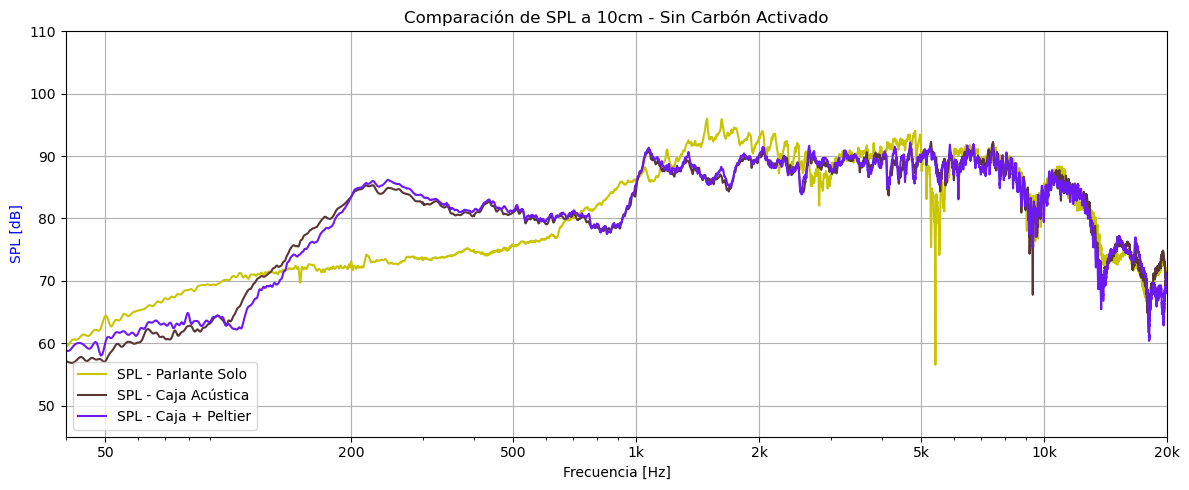

In [21]:
# Define colores por categoría
colores = {
    'Parlante Solo': "#c9c503", # amarillo
    'Caja Acústica': "#5a3737",  # café 
    'Caja + Peltier': "#6d19f4",       # morado    
}

graficar_comparacion_grupo(
    archivos=['Parlante_Mic_10cm.txt','Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación de SPL a 10cm - Sin Carbón Activado',
    lim_x=(40,20000),
    lim_y_spl=(45,110),
    nombre_archivo='sin_carbon_10cm'
)

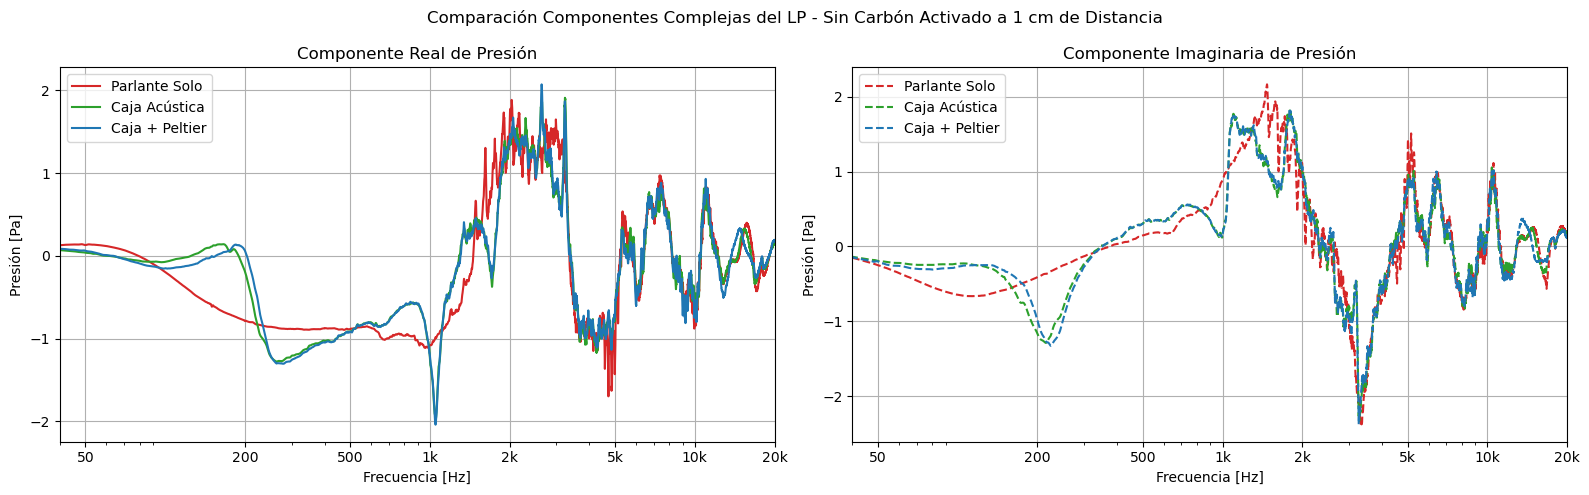

In [22]:
# Define colores por categoría
colores = {
    'Parlante Solo': '#d62728', # rojo
    'Caja Acústica': '#2ca02c',  # verde 
    'Caja + Peltier': '#1f77b4',       # celeste   
}

graficar_complejo_grupo(
    archivos=['Parlante_Mic_1cm.txt','Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Sin Carbón Activado a 1 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_1cm'
)

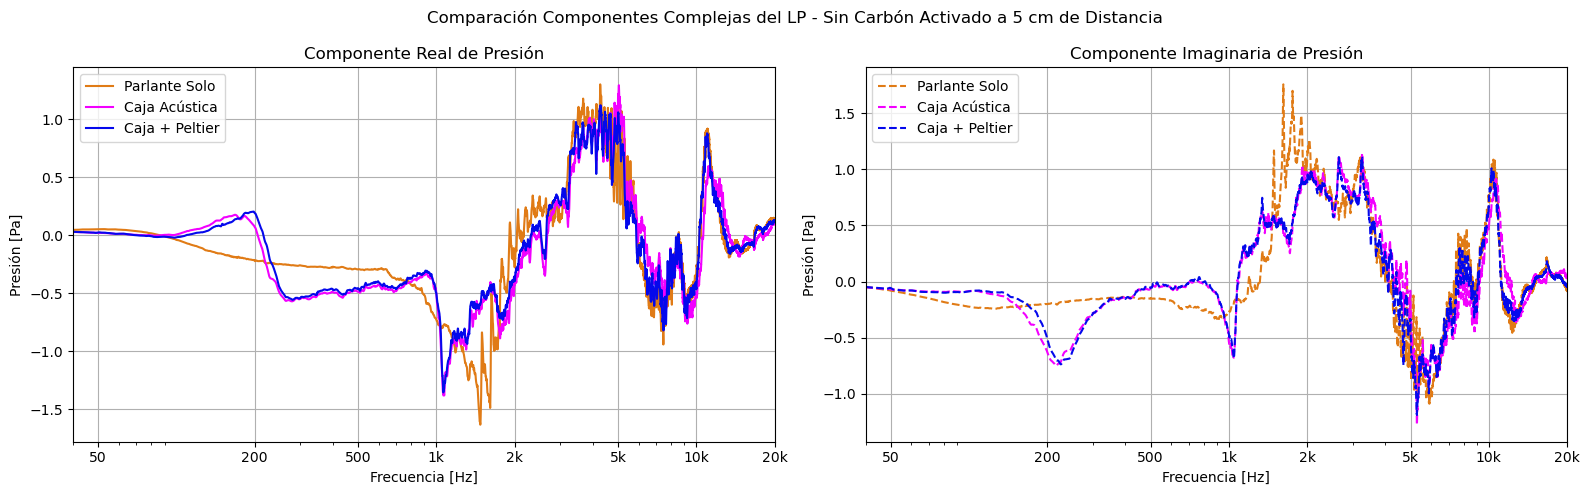

In [23]:
# Define colores por categoría
colores = {
    'Parlante Solo': "#e07b16", # naranja
    'Caja Acústica': "#f200ff",  # rosa 
    'Caja + Peltier': "#0408ec",       # azul   
}

graficar_complejo_grupo(
    archivos=['Parlante_Mic_5cm.txt','Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Sin Carbón Activado a 5 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_5cm'
)

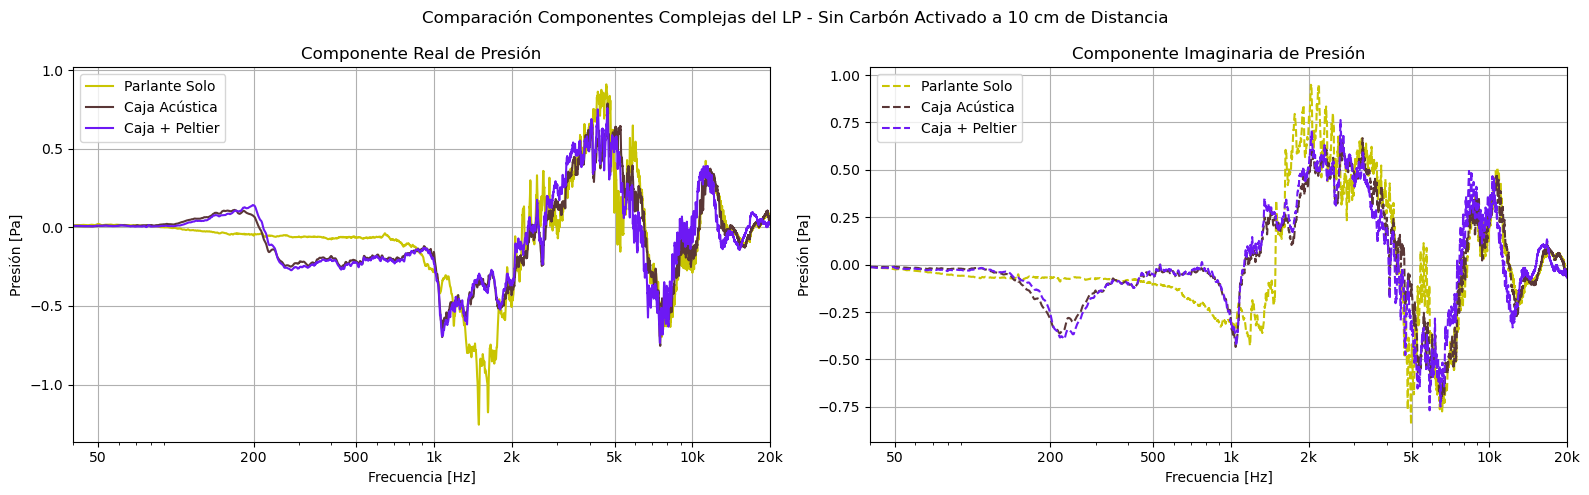

In [24]:
# Define colores por categoría
colores = {
    'Parlante Solo': "#c9c503", # amarillo
    'Caja Acústica': "#5a3737",  # café 
    'Caja + Peltier': "#6d19f4",       # morado   
}

graficar_complejo_grupo(
    archivos=['Parlante_Mic_10cm.txt','Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt'],
    etiquetas=['Parlante Solo', 'Caja Acústica', 'Caja + Peltier'],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Sin Carbón Activado a 10 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_10cm'
)

#### Los siguientes gráficos están comparados como:
- Mediciones mezcladas con 1 cm de carbón sin tratar para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con... 
  - Caja Acústica
  - Caja + Peltier
  - Carbón 1cm Sin Tratar
  - Carbón 1cm Sin Tratar + Peltier
- Mediciones mezcladas con 1 cm de carbón tratado para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con...   
  - Caja Acústica
  - Caja + Peltier 
  - Carbón 1cm Tratado
  - Carbón 1cm Tratado + Peltier
- Mediciones mezcladas con 2 cm de carbón para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con...
  - Caja Acústica
  - Caja + Peltier
  - Carbón 2cm Sin Tratar
  - Carbón 2cm Sin Tratar + Peltier
- Mediciones mezcladas con 3 cm de carbón para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con...
  - Caja Acústica
  - Caja + Peltier
  - Carbón 3cm Sin Tratar
  - Carbón 3cm Sin Tratar + Peltier

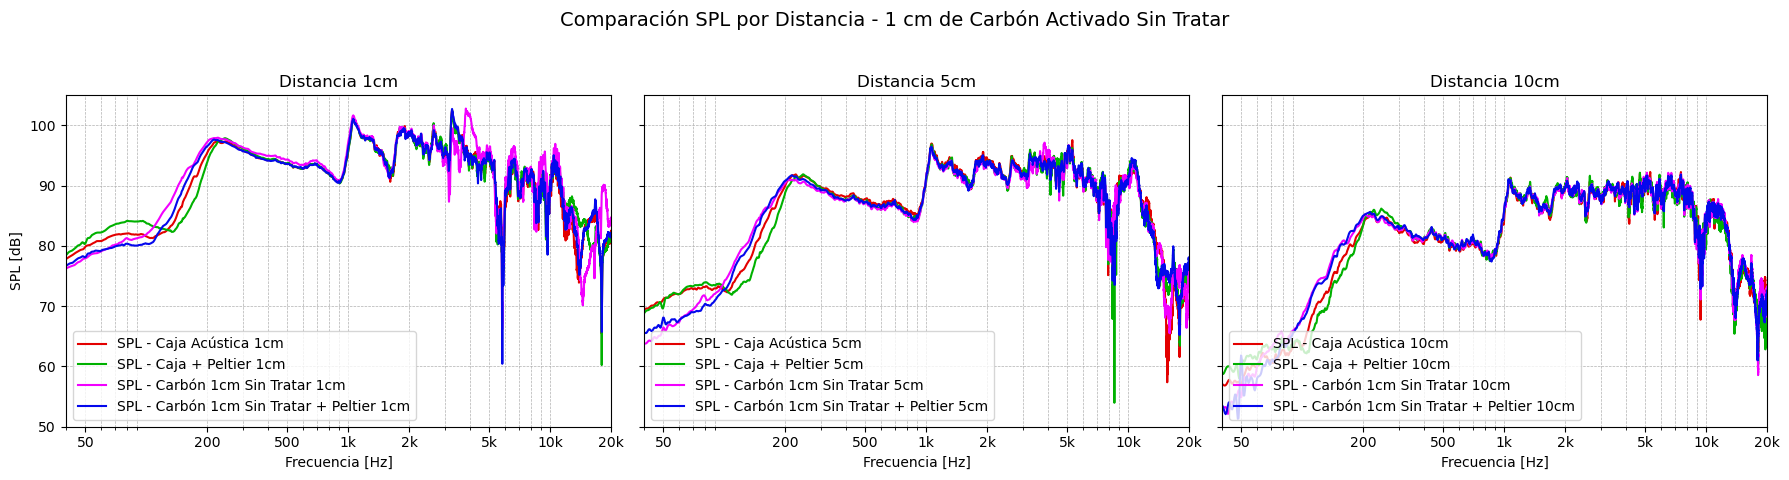

In [25]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 1cm Sin Tratar 1cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar 5cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar 10cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 1cm Sin Tratar + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 1cm Sin Tratar + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Caja_Carbon_SinTratar_1cm_Mic_1cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Caja_Carbon_SinTratar_1cm_Mic_5cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Caja_Carbon_SinTratar_1cm_Mic_10cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 1cm Sin Tratar 1cm', 'Carbón 1cm Sin Tratar + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 1cm Sin Tratar 5cm', 'Carbón 1cm Sin Tratar + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 1cm Sin Tratar 10cm', 'Carbón 1cm Sin Tratar + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 1 cm de Carbón Activado Sin Tratar',
    nombre_archivo='comparacion_distancia_carbon_1cm_sintratar',
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

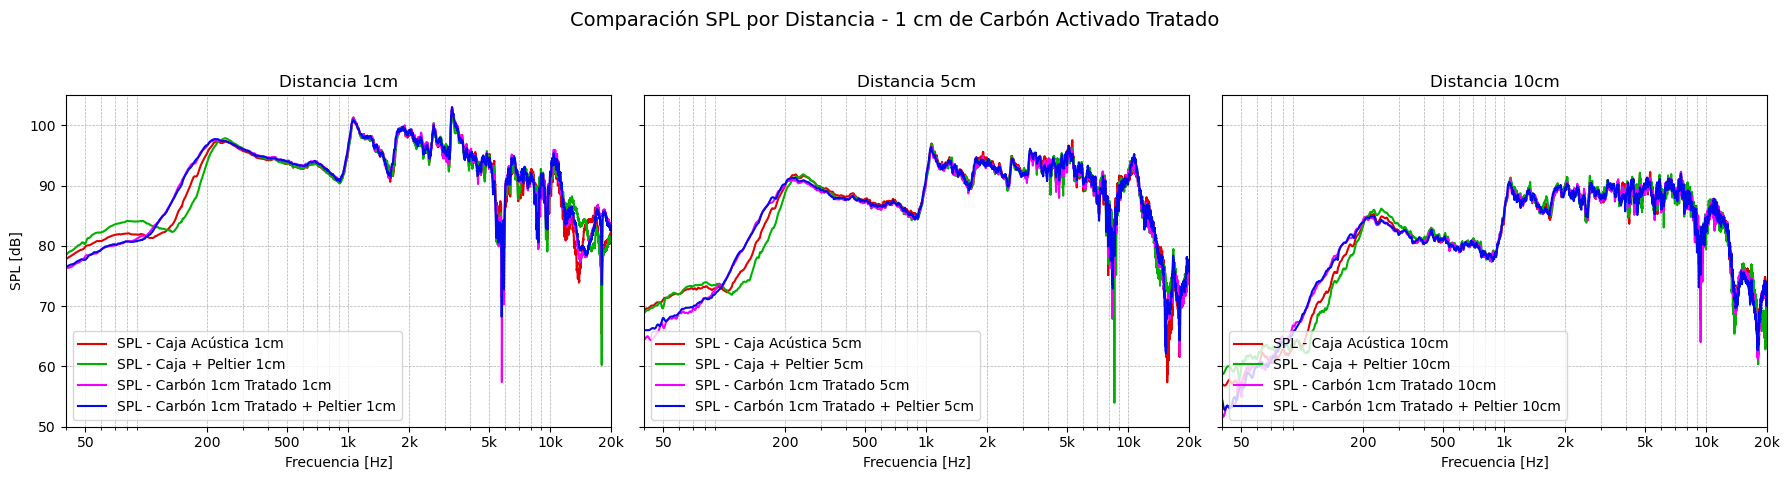

In [26]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 1cm Tratado 1cm':  "#f200ff",  # rosa 
    'Carbón 1cm Tratado 5cm':  "#f200ff",  # rosa 
    'Carbón 1cm Tratado 10cm':  "#f200ff",  # rosa 
    'Carbón 1cm Tratado + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 1cm Tratado + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 1cm Tratado + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Caja_Carbon_Tratado_1cm_Mic_1cm.txt','Peltier_Carbon_Tratado_1cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Caja_Carbon_Tratado_1cm_Mic_5cm.txt','Peltier_Carbon_Tratado_1cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Caja_Carbon_Tratado_1cm_Mic_10cm.txt','Peltier_Carbon_Tratado_1cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 1cm Tratado 1cm', 'Carbón 1cm Tratado + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 1cm Tratado 5cm', 'Carbón 1cm Tratado + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 1cm Tratado 10cm', 'Carbón 1cm Tratado + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 1 cm de Carbón Activado Tratado',
    nombre_archivo='comparacion_distancia_carbon_1cm_tratado',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

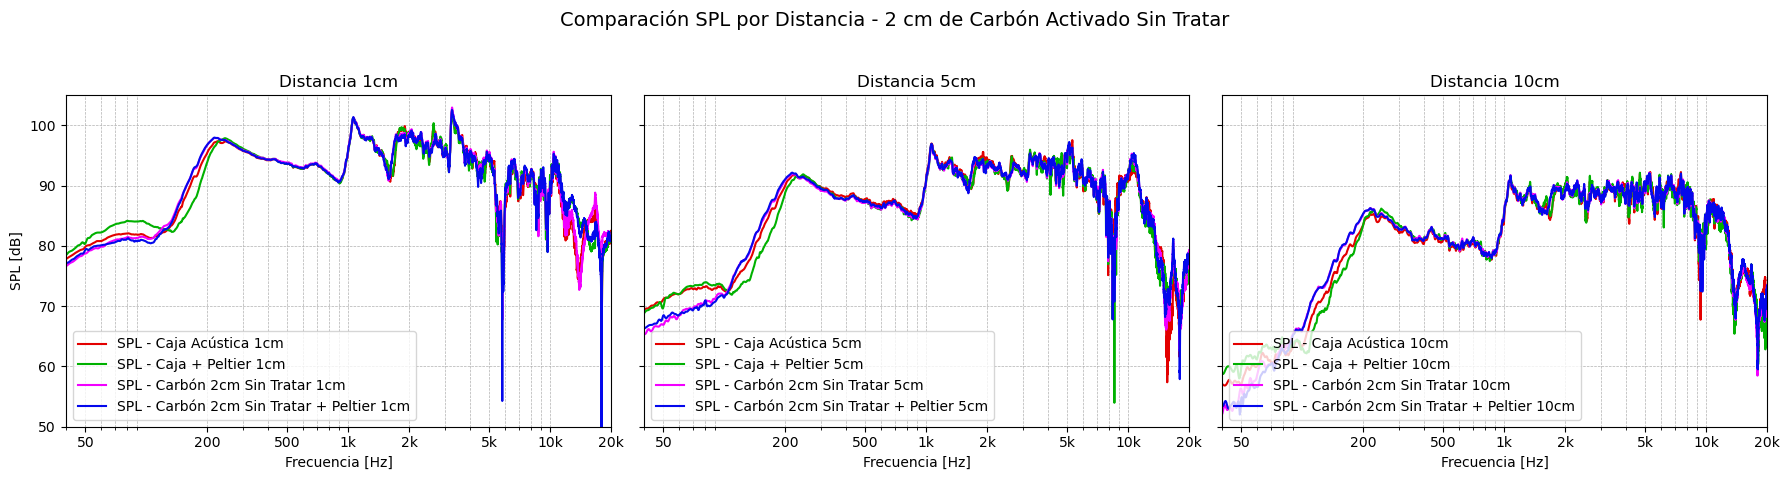

In [27]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 1cm':  "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar 5cm':  "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar 10cm':  "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 2cm Sin Tratar + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 2cm Sin Tratar + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Caja_Carbon_SinTratar_2cm_Mic_1cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Caja_Carbon_SinTratar_2cm_Mic_5cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Caja_Carbon_SinTratar_2cm_Mic_10cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 2cm Sin Tratar 1cm', 'Carbón 2cm Sin Tratar + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 2cm Sin Tratar 5cm', 'Carbón 2cm Sin Tratar + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 2cm Sin Tratar 10cm', 'Carbón 2cm Sin Tratar + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 2 cm de Carbón Activado Sin Tratar',
    nombre_archivo='comparacion_distancia_carbon_2cm_sintratar',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

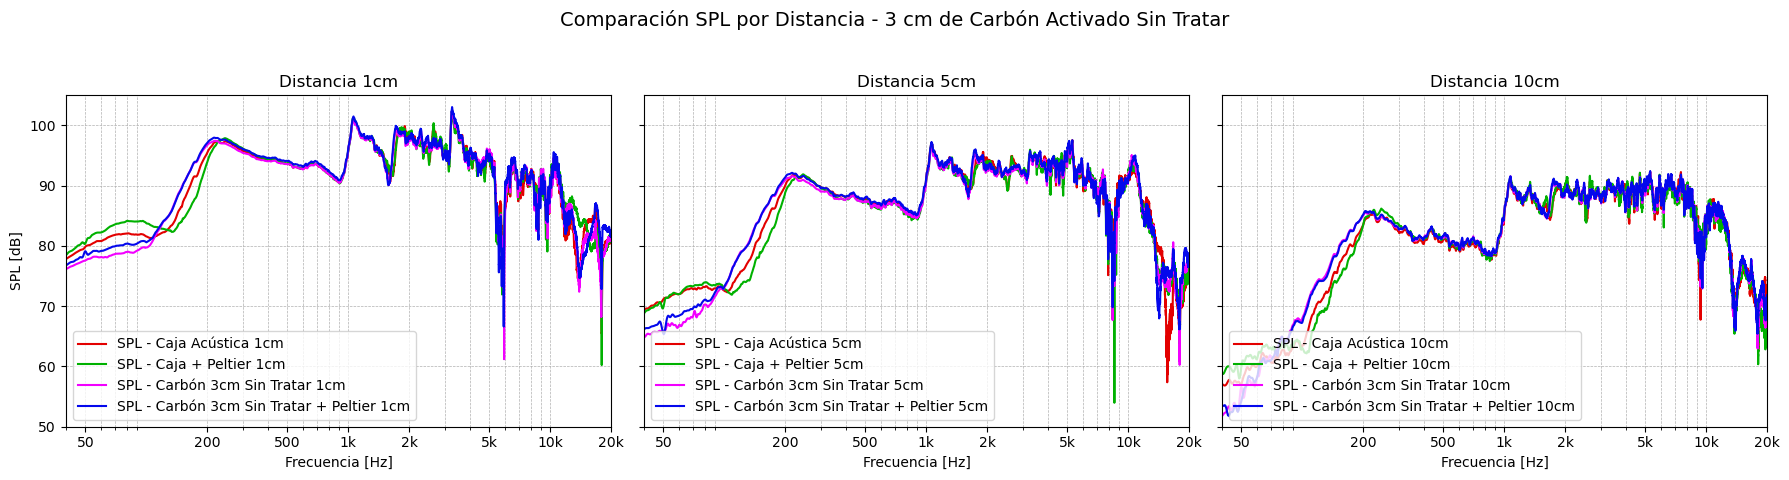

In [28]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 3cm Sin Tratar 1cm':  "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar 5cm':  "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar 10cm':  "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 3cm Sin Tratar + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 3cm Sin Tratar + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Caja_Carbon_SinTratar_3cm_Mic_1cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Caja_Carbon_SinTratar_3cm_Mic_5cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Caja_Carbon_SinTratar_3cm_Mic_10cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 3cm Sin Tratar 1cm', 'Carbón 3cm Sin Tratar + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 3cm Sin Tratar 5cm', 'Carbón 3cm Sin Tratar + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 3cm Sin Tratar 10cm', 'Carbón 3cm Sin Tratar + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 3 cm de Carbón Activado Sin Tratar',
    nombre_archivo='comparacion_distancia_carbon_3cm_sintratar',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

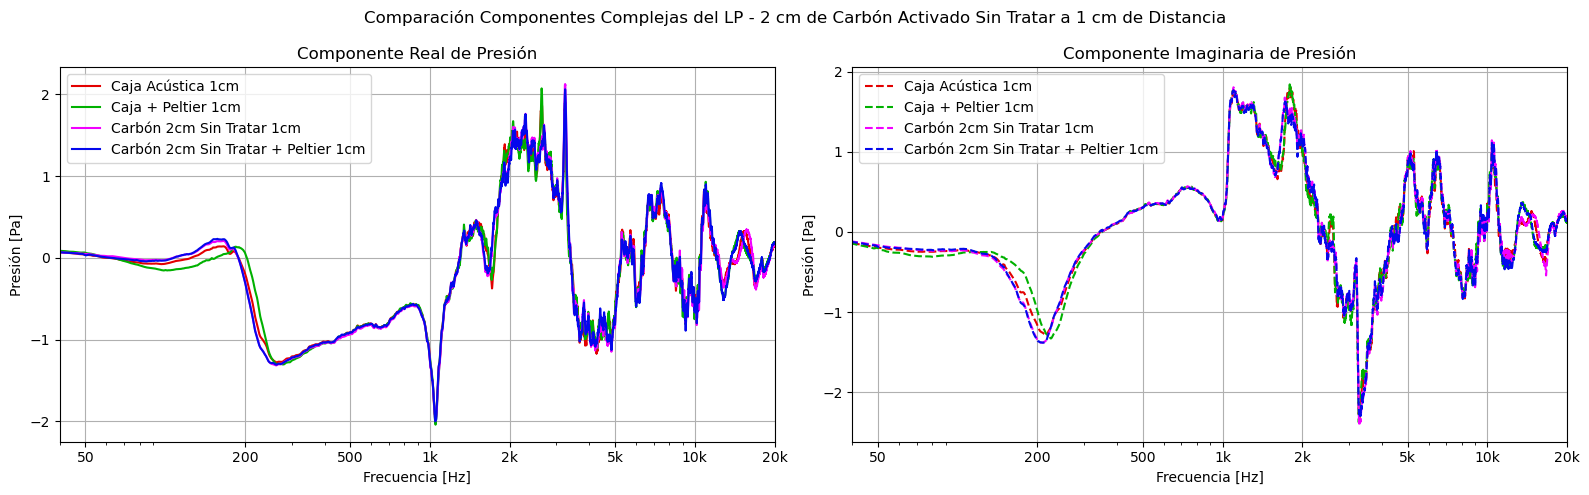

In [29]:
# Define colores por categoría
colores = {
    'Caja Acústica 1cm': '#e30000', # rojo
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 1cm': "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 1cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_1cm.txt',
        'Peltier_Mic_1cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_1cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_1cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 1cm',
        'Caja + Peltier 1cm',
        'Carbón 2cm Sin Tratar 1cm',
        'Carbón 2cm Sin Tratar + Peltier 1cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado Sin Tratar a 1 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_2cm_Mic_1cm_sintratar'
)

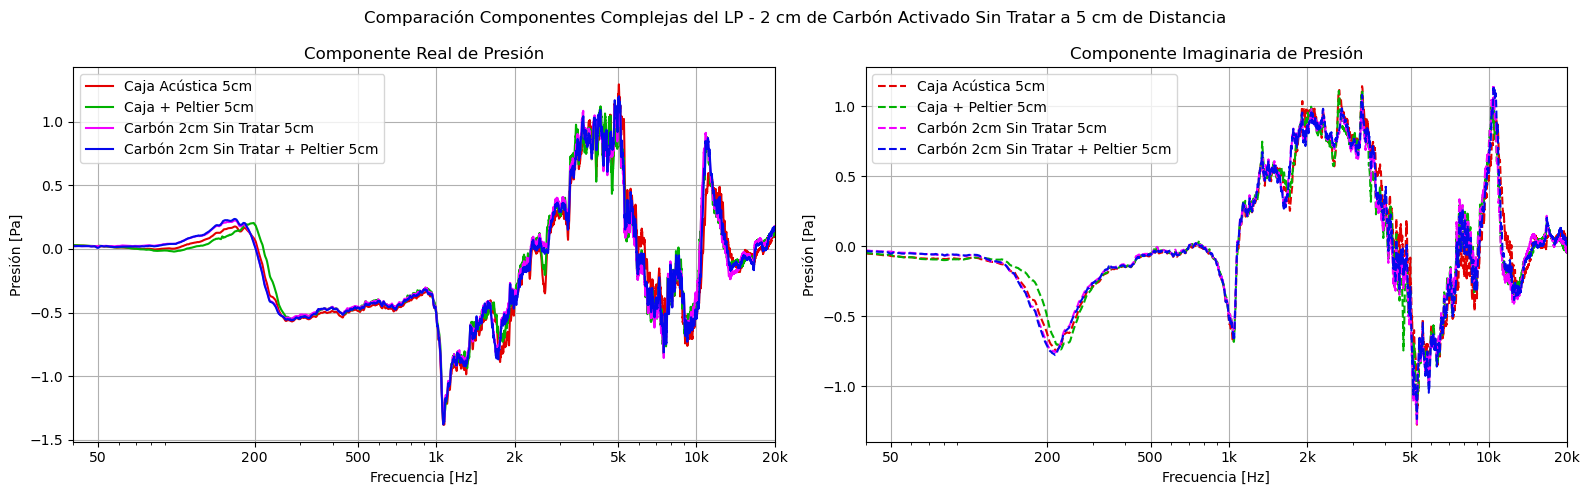

In [30]:
# Define colores por categoría
colores = {
    'Caja Acústica 5cm': '#e30000', # rojo
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 5cm': "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 5cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_5cm.txt',
        'Peltier_Mic_5cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_5cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_5cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 5cm',
        'Caja + Peltier 5cm',
        'Carbón 2cm Sin Tratar 5cm',
        'Carbón 2cm Sin Tratar + Peltier 5cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado Sin Tratar a 5 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_2cm_Mic_5cm_sintratar'
)

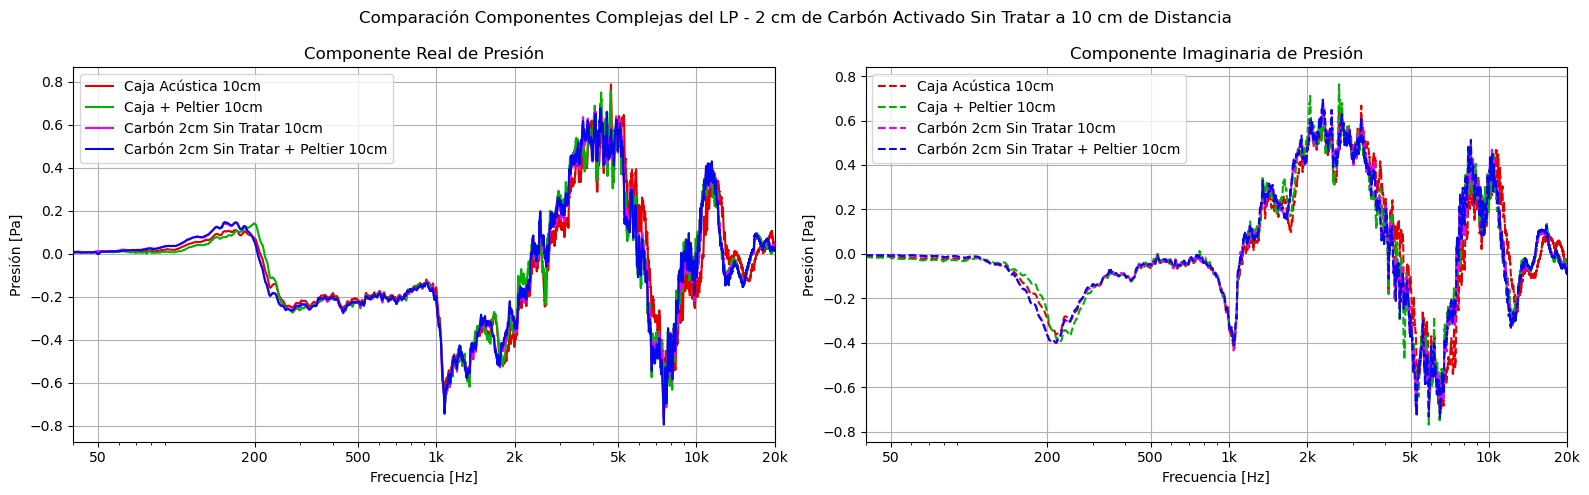

In [31]:
# Define colores por categoría
colores = {
    'Caja Acústica 10cm': '#e30000', # rojo
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 10cm': "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 10cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_10cm.txt',
        'Peltier_Mic_10cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_10cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_10cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 10cm',
        'Caja + Peltier 10cm',
        'Carbón 2cm Sin Tratar 10cm',
        'Carbón 2cm Sin Tratar + Peltier 10cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado Sin Tratar a 10 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_2cm_Mic_10cm_sintratar'
)

#### Los siguientes gráficos están comparados como:
- Mediciones mezcladas con 1 cm de carbón para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con... 
  - Caja Acústica
  - Caja + Peltier
  - Carbón 1cm Sin Tratar + Peltier
  - Carbón 1cm Tratado + Peltier
- Mediciones mezcladas con 2 cm de carbón para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con...
  - Caja Acústica
  - Caja + Peltier
  - Carbón 2cm Sin Tratar + Peltier
  - Carbón 2cm Tratado + Peltier
- Mediciones mezcladas con 3 cm de carbón para distancias de 1, 5 y 10 cm: Contiene las mediciones realizadas con...
  - Caja Acústica
  - Caja + Peltier
  - Carbón 3cm Sin Tratar + Peltier
  - Carbón 3cm Tratado + Peltier

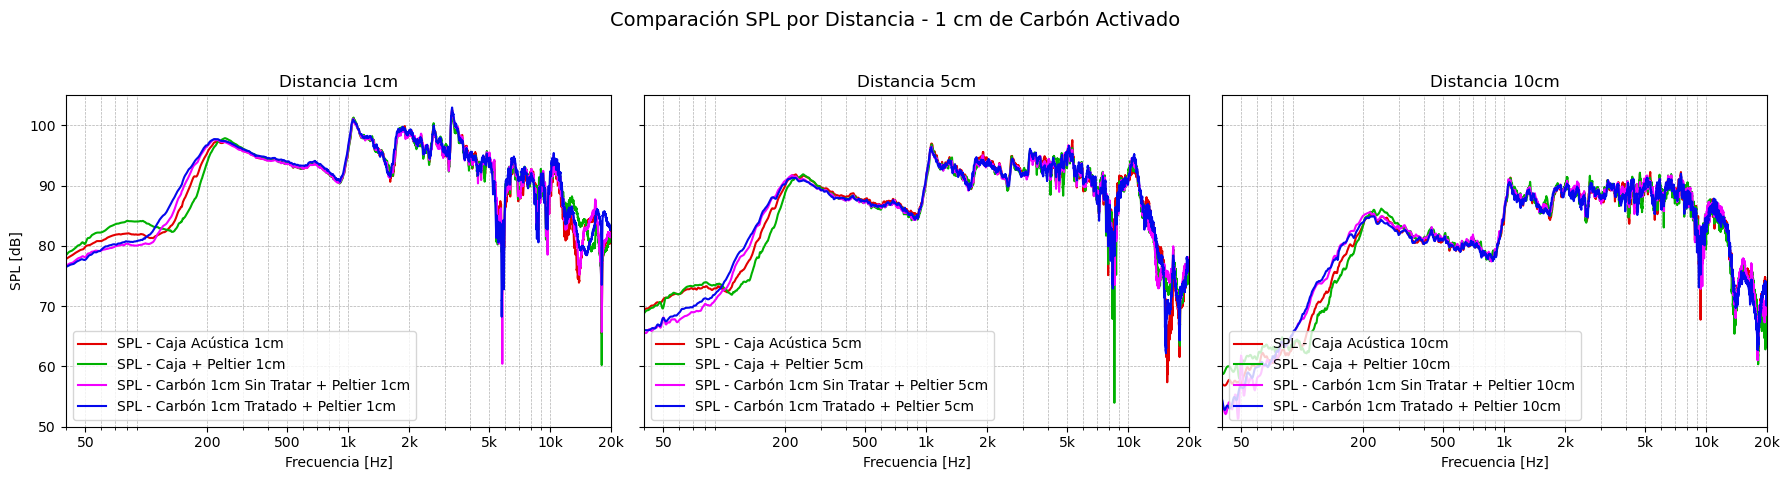

In [32]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 1cm Sin Tratar + Peltier 1cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar + Peltier 5cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar + Peltier 10cm':  "#f200ff",  # rosa 
    'Carbón 1cm Tratado + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 1cm Tratado + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 1cm Tratado + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_1cm.txt','Peltier_Carbon_Tratado_1cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_5cm.txt','Peltier_Carbon_Tratado_1cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Peltier_Carbon_SinTratar_1cm_Mic_10cm.txt','Peltier_Carbon_Tratado_1cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 1cm Sin Tratar + Peltier 1cm', 'Carbón 1cm Tratado + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 1cm Sin Tratar + Peltier 5cm', 'Carbón 1cm Tratado + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 1cm Sin Tratar + Peltier 10cm', 'Carbón 1cm Tratado + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 1 cm de Carbón Activado',
    nombre_archivo='comparacion_distancia_carbon_1cm_peltier',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

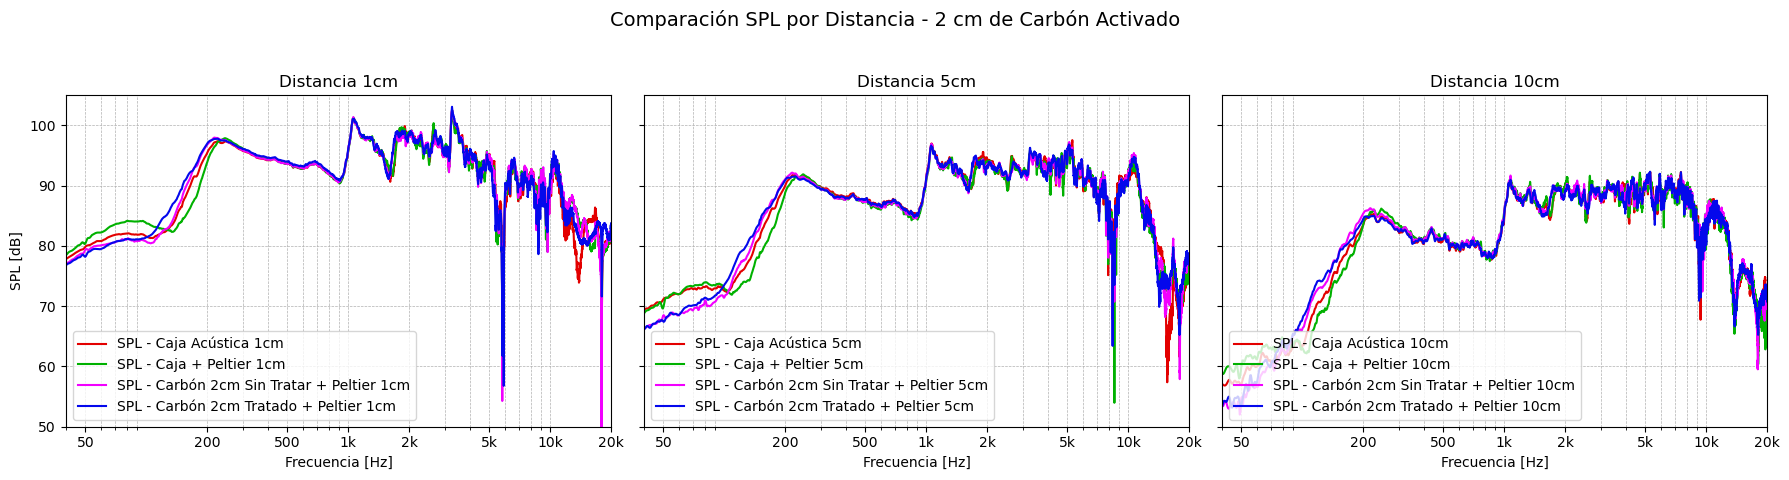

In [33]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + Peltier 1cm':  "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 5cm':  "#f200ff",  # rosa 
    'Carbón 2cm Sin Tratar + Peltier 10cm':  "#f200ff",  # rosa 
    'Carbón 2cm Tratado + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 2cm Tratado + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 2cm Tratado + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_1cm.txt','Peltier_Carbon_Tratado_2cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_5cm.txt','Peltier_Carbon_Tratado_2cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Peltier_Carbon_SinTratar_2cm_Mic_10cm.txt','Peltier_Carbon_Tratado_2cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 2cm Sin Tratar + Peltier 1cm', 'Carbón 2cm Tratado + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 2cm Sin Tratar + Peltier 5cm', 'Carbón 2cm Tratado + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 2cm Sin Tratar + Peltier 10cm', 'Carbón 2cm Tratado + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 2 cm de Carbón Activado',
    nombre_archivo='comparacion_distancia_carbon_2cm_peltier',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

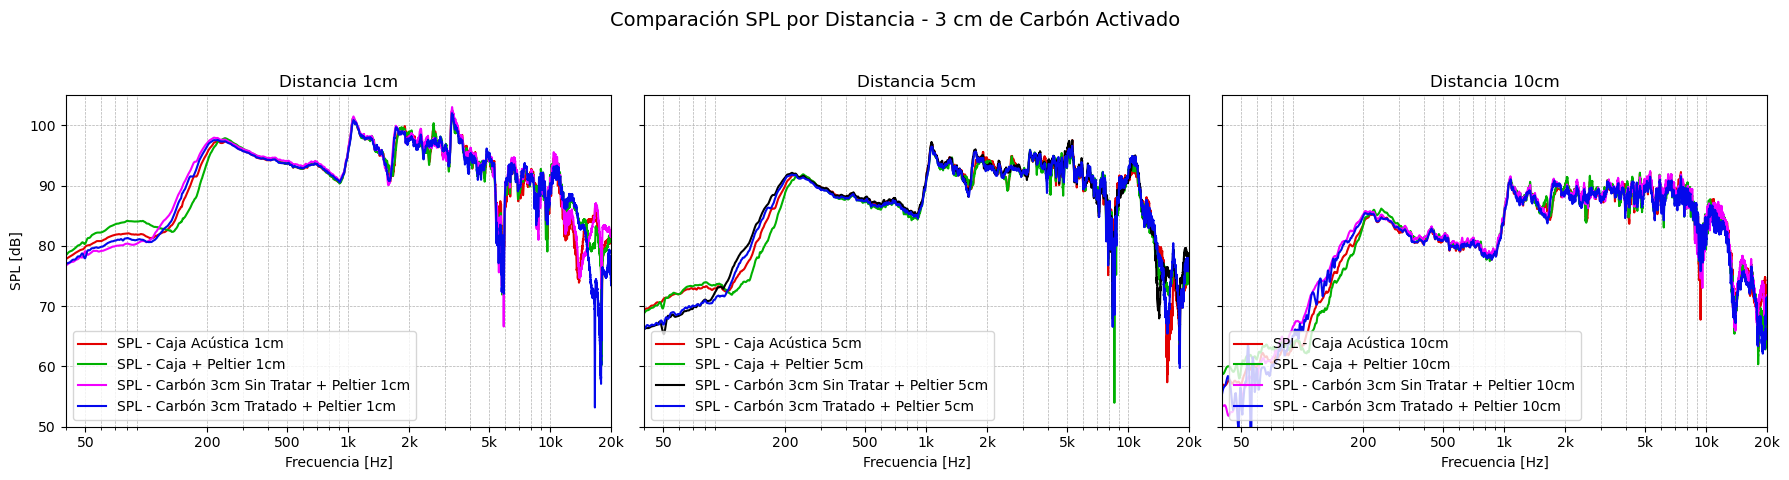

In [34]:
colores = { 
    'Caja Acústica 1cm': "#e30000", # rojo,
    'Caja Acústica 5cm': "#e30000", # rojo,
    'Caja Acústica 10cm': "#e30000", # rojo,
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 3cm Sin Tratar + Peltier 1cm':  "#f200ff",  # rosa 
    'Carbón 1cm Sin Tratar + Peltier 5cm':  "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar + Peltier 10cm':  "#f200ff",  # rosa 
    'Carbón 3cm Tratado + Peltier 1cm': "#0408ec",  # azul  
    'Carbón 3cm Tratado + Peltier 5cm':"#0408ec",  # azul  
    'Carbón 3cm Tratado + Peltier 10cm': "#0408ec",  # azul  
}

grupo_1cm = ['Caja_Mic_1cm.txt','Peltier_Mic_1cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_1cm.txt','Peltier_Carbon_Tratado_3cm_Mic_1cm.txt']
grupo_5cm = ['Caja_Mic_5cm.txt','Peltier_Mic_5cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_5cm.txt','Peltier_Carbon_Tratado_3cm_Mic_5cm.txt']
grupo_10cm = ['Caja_Mic_10cm.txt','Peltier_Mic_10cm.txt','Peltier_Carbon_SinTratar_3cm_Mic_10cm.txt','Peltier_Carbon_Tratado_3cm_Mic_10cm.txt']

etiquetas_1cm = ['Caja Acústica 1cm','Caja + Peltier 1cm', 'Carbón 3cm Sin Tratar + Peltier 1cm', 'Carbón 3cm Tratado + Peltier 1cm']
etiquetas_5cm = ['Caja Acústica 5cm','Caja + Peltier 5cm', 'Carbón 3cm Sin Tratar + Peltier 5cm', 'Carbón 3cm Tratado + Peltier 5cm']
etiquetas_10cm = ['Caja Acústica 10cm','Caja + Peltier 10cm', 'Carbón 3cm Sin Tratar + Peltier 10cm', 'Carbón 3cm Tratado + Peltier 10cm']

graficar_comparacion_por_distancia(
    grupos_archivos=[grupo_1cm, grupo_5cm, grupo_10cm],
    etiquetas_grupos=[etiquetas_1cm, etiquetas_5cm, etiquetas_10cm],
    categorias_color=colores,
    titulo_general='Comparación SPL por Distancia - 3 cm de Carbón Activado',
    nombre_archivo='comparacion_distancia_carbon_3cm_peltier',
    #mostrar_fase=True,
    lim_x=(40,20000),
    lim_y_spl=(50,105)
)

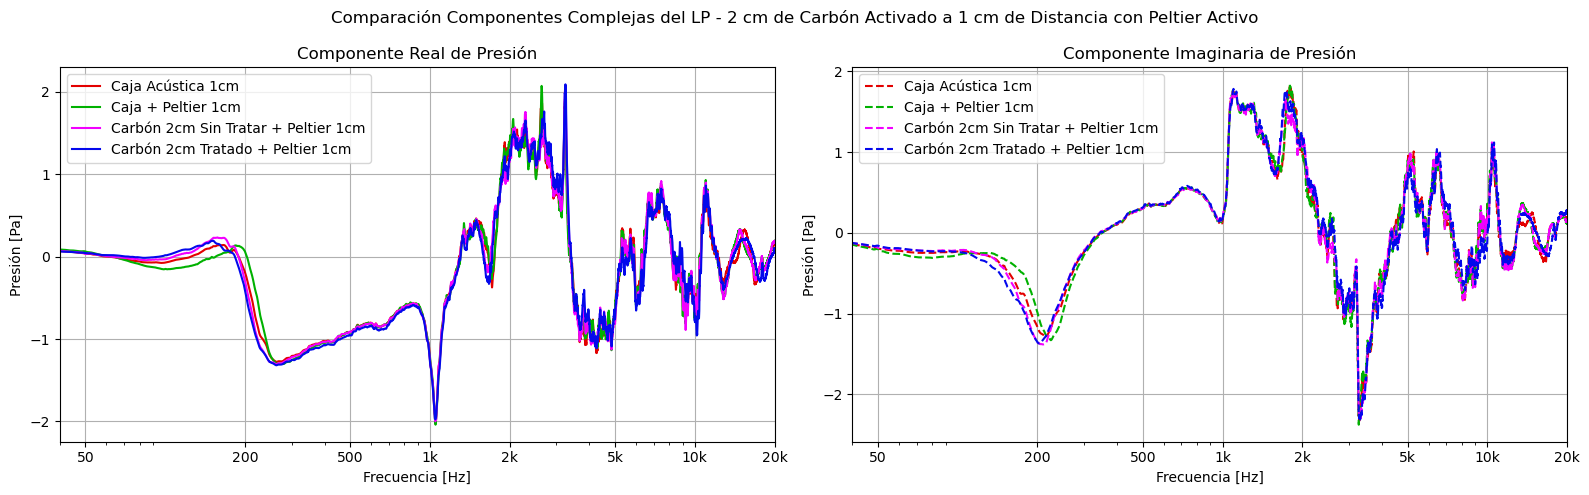

In [35]:
# Define colores por categoría
colores = {
    'Caja Acústica 1cm': '#e30000', # rojo
    'Caja + Peltier 1cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + Peltier 1cm': "#f200ff",  # rosa 
    'Carbón 2cm Tratado + Peltier 1cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_1cm.txt',
        'Peltier_Mic_1cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_1cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_1cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 1cm',
        'Caja + Peltier 1cm',
        'Carbón 2cm Sin Tratar + Peltier 1cm',
        'Carbón 2cm Tratado + Peltier 1cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado a 1 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_2cm_Mic_1cm_peltier'
)

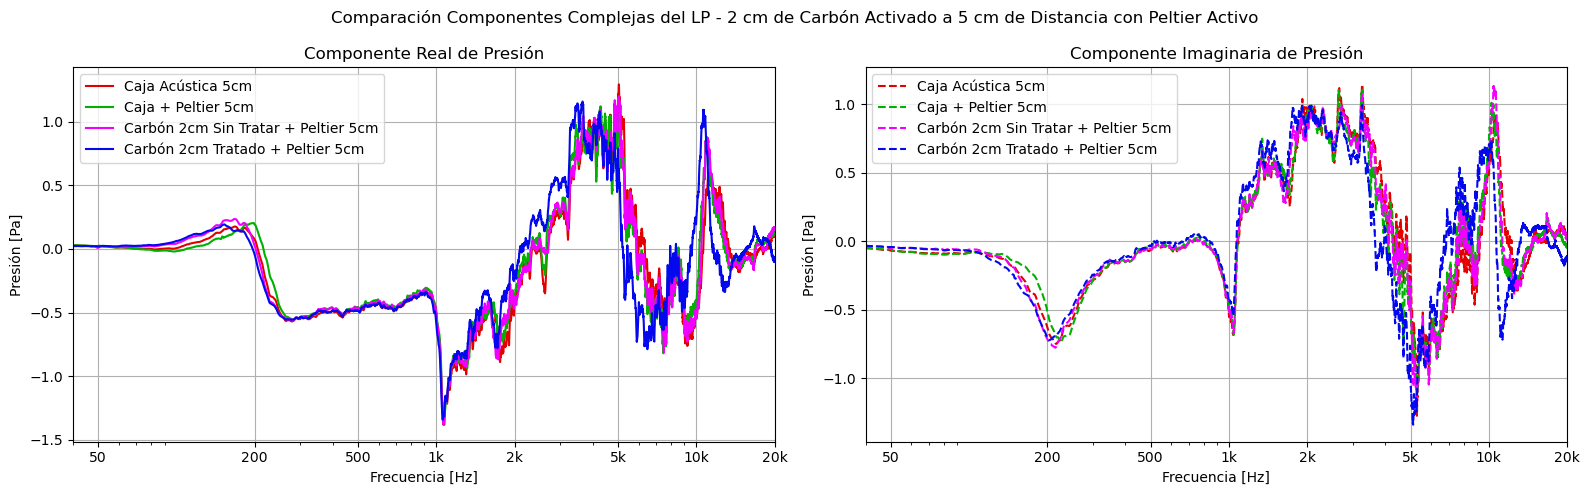

In [36]:
# Define colores por categoría
colores = {
    'Caja Acústica 5cm': '#e30000', # rojo
    'Caja + Peltier 5cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + Peltier 5cm': "#f200ff",  # rosa 
    'Carbón 2cm Tratado + Peltier 5cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_5cm.txt',
        'Peltier_Mic_5cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_5cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_5cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 5cm',
        'Caja + Peltier 5cm',
        'Carbón 2cm Sin Tratar + Peltier 5cm',
        'Carbón 2cm Tratado + Peltier 5cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado a 5 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_2cm_Mic_5cm_peltier'
)

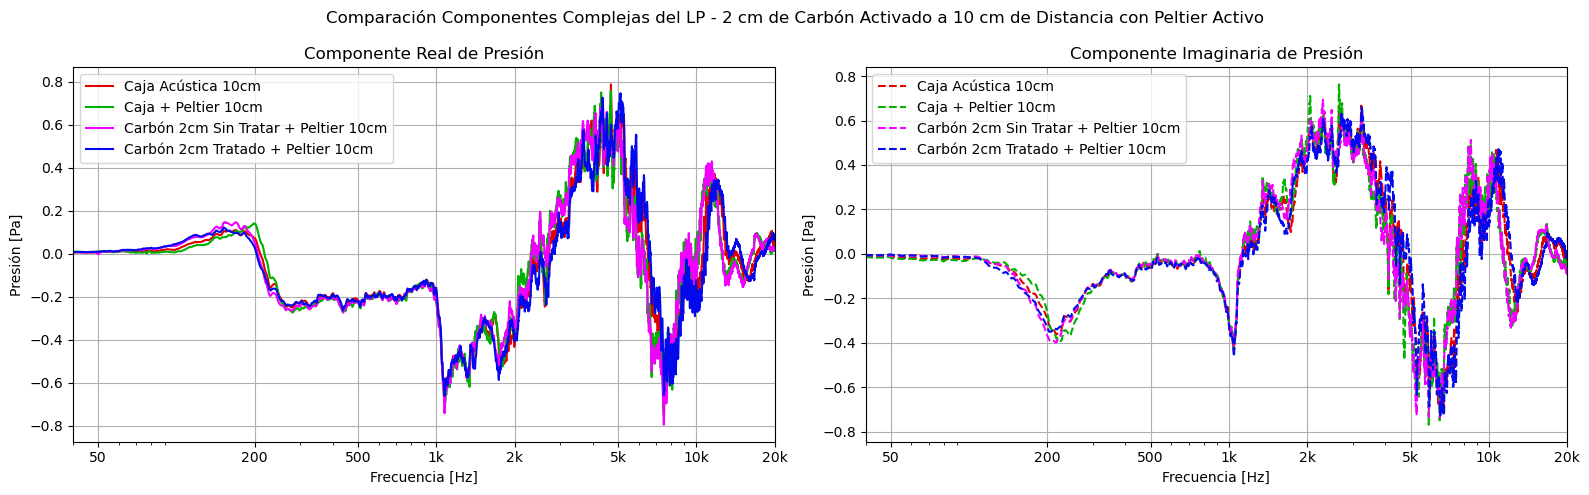

In [37]:
# Define colores por categoría
colores = {
    'Caja Acústica 10cm': '#e30000', # rojo
    'Caja + Peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + Peltier 10cm': "#f200ff",  # rosa 
    'Carbón 2cm Tratado + Peltier 10cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_10cm.txt',
        'Peltier_Mic_10cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_10cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_10cm.txt'
    ],
    etiquetas=[
        'Caja Acústica 10cm',
        'Caja + Peltier 10cm',
        'Carbón 2cm Sin Tratar + Peltier 10cm',
        'Carbón 2cm Tratado + Peltier 10cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - 2 cm de Carbón Activado a 10 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_2cm_Mic_10cm_peltier'
)

#### Los siguientes gráficos están comparados como:
- Mediciones mezcladas carbón sin tratar: Contiene las mediciones realizadas con... 
  - Caja Acústica
  - Carbón 1cm Sin Tratar
  - Carbón 2cm Sin Tratar
  - Carbón 3cm Sin Tratar
- Mediciones mezcladas con carbón sin tratar con peltier activo: Contiene las mediciones realizadas con...
  - Caja + Peltier
  - Carbón 1cm Sin Tratar + Peltier
  - Carbón 2cm Sin Tratar + Peltier
  - Carbón 3cm Sin Tratar + Peltier
- Mediciones mezcladas con carbón tratado con peltier activo: Contiene las mediciones realizadas con...
  - Caja + Peltier
  - Carbón 1cm Tratado + Peltier
  - Carbón 2cm Tratado + Peltier
  - Carbón 3cm Tratado + Peltier

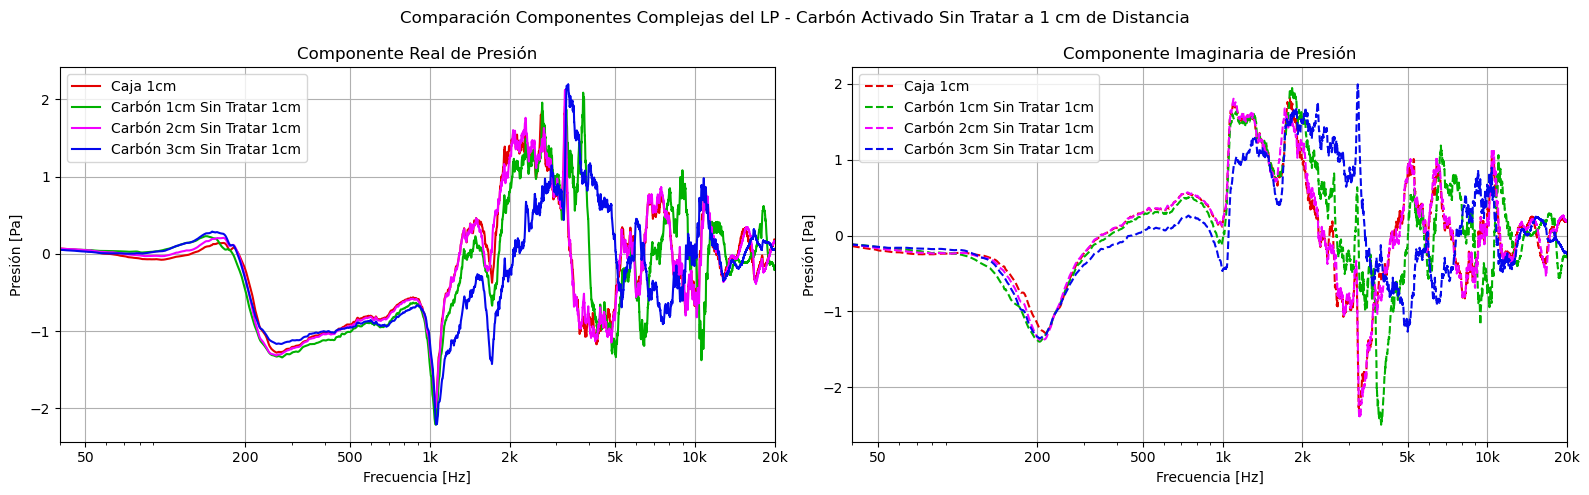

In [38]:
# Define colores por categoría
colores = {
    'Caja 1cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar 1cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 1cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar 1cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_1cm.txt',
        'Caja_Carbon_SinTratar_1cm_Mic_1cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_1cm.txt',
        'Caja_Carbon_SinTratar_3cm_Mic_1cm.txt'
    ],
    etiquetas=[
        'Caja 1cm',
        'Carbón 1cm Sin Tratar 1cm',
        'Carbón 2cm Sin Tratar 1cm',
        'Carbón 3cm Sin Tratar 1cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 1 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_1cm'
)

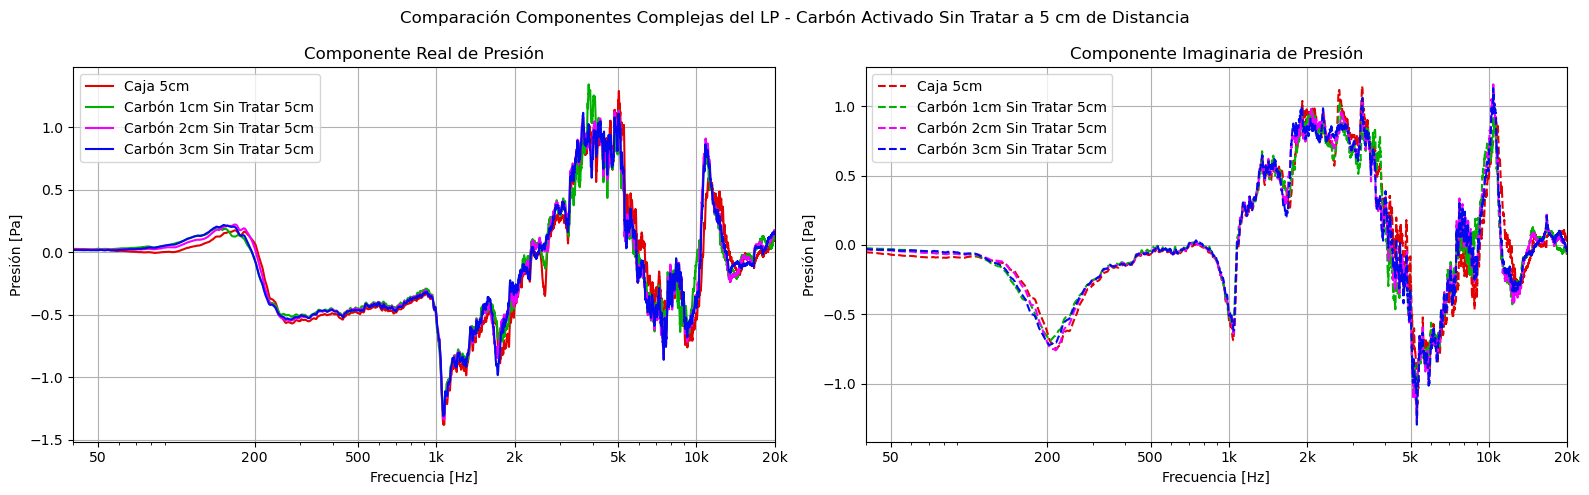

In [39]:
# Define colores por categoría
colores = {
    'Caja 5cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar 5cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 5cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar 5cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_5cm.txt',
        'Caja_Carbon_SinTratar_1cm_Mic_5cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_5cm.txt',
        'Caja_Carbon_SinTratar_3cm_Mic_5cm.txt'
    ],
    etiquetas=[
        'Caja 5cm',
        'Carbón 1cm Sin Tratar 5cm',
        'Carbón 2cm Sin Tratar 5cm',
        'Carbón 3cm Sin Tratar 5cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 5 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_5cm'
)

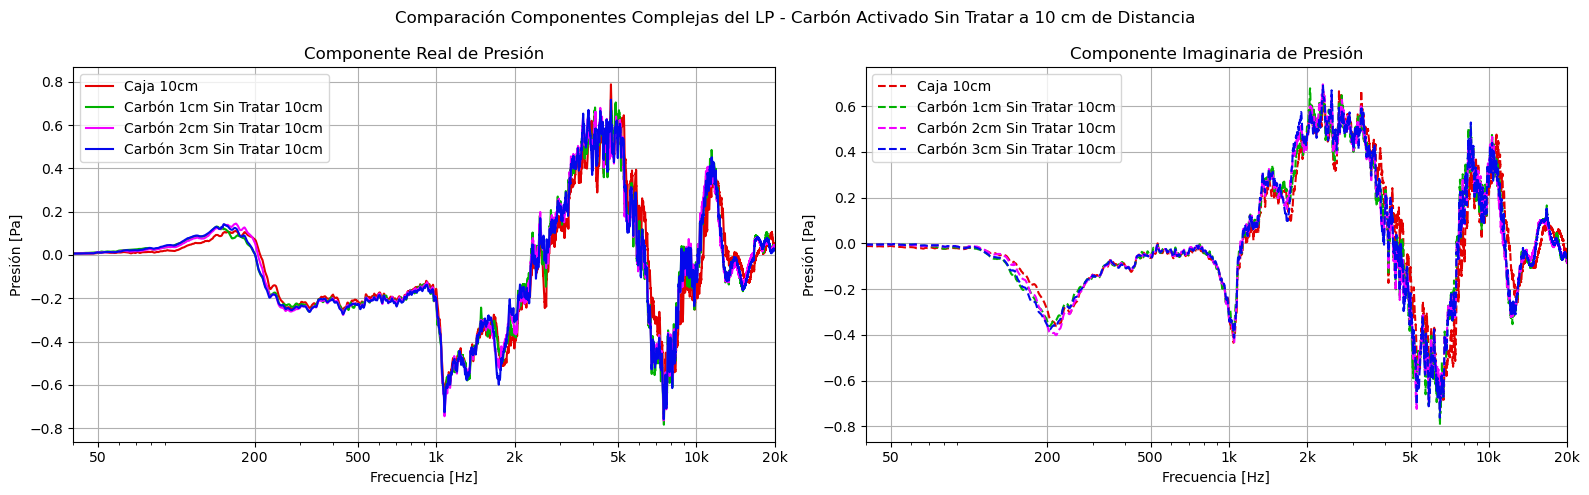

In [40]:
# Define colores por categoría
colores = {
    'Caja 10cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar 10cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar 10cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Caja_Mic_10cm.txt',
        'Caja_Carbon_SinTratar_1cm_Mic_10cm.txt',
        'Caja_Carbon_SinTratar_2cm_Mic_10cm.txt',
        'Caja_Carbon_SinTratar_3cm_Mic_10cm.txt'
    ],
    etiquetas=[
        'Caja 10cm',
        'Carbón 1cm Sin Tratar 10cm',
        'Carbón 2cm Sin Tratar 10cm',
        'Carbón 3cm Sin Tratar 10cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 10 cm de Distancia',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_10cm'
)

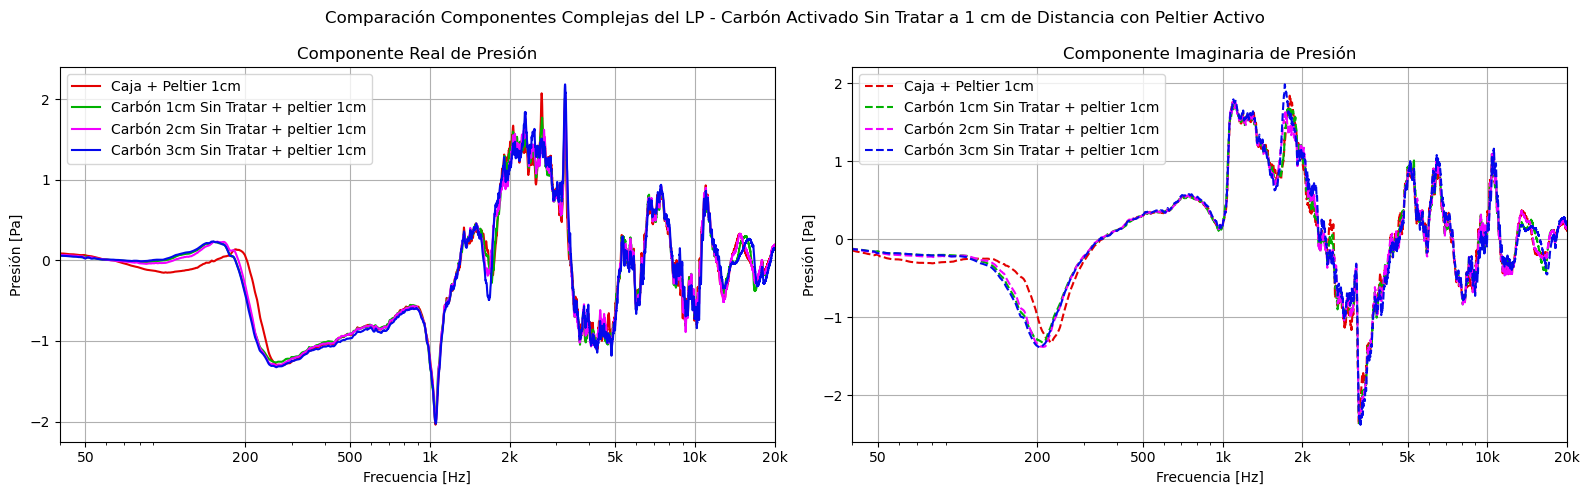

In [41]:
# Define colores por categoría
colores = {
    'Caja + Peltier 1cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar + peltier 1cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + peltier 1cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar + peltier 1cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_1cm.txt',
        'Peltier_Carbon_SinTratar_1cm_Mic_1cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_1cm.txt',
        'Peltier_Carbon_SinTratar_3cm_Mic_1cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 1cm',
        'Carbón 1cm Sin Tratar + peltier 1cm',
        'Carbón 2cm Sin Tratar + peltier 1cm',
        'Carbón 3cm Sin Tratar + peltier 1cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 1 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_1cm_peltier'
)

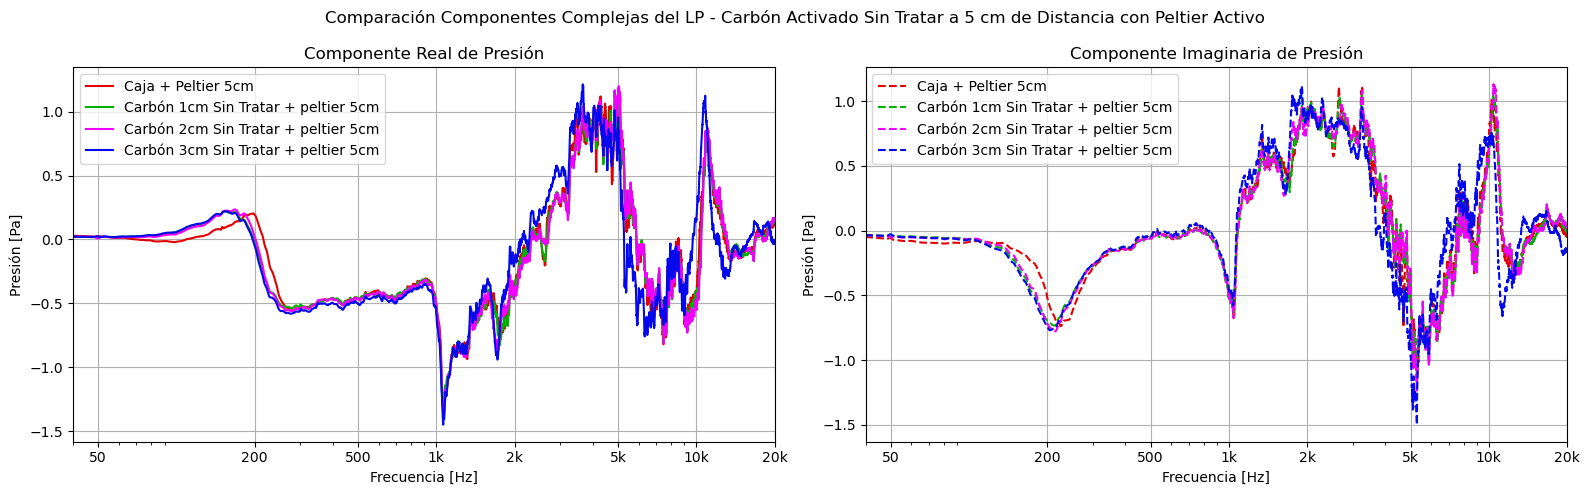

In [42]:
# Define colores por categoría
colores = {
    'Caja + Peltier 5cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar + peltier 5cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + peltier 5cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar + peltier 5cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_5cm.txt',
        'Peltier_Carbon_SinTratar_1cm_Mic_5cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_5cm.txt',
        'Peltier_Carbon_SinTratar_3cm_Mic_5cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 5cm',
        'Carbón 1cm Sin Tratar + peltier 5cm',
        'Carbón 2cm Sin Tratar + peltier 5cm',
        'Carbón 3cm Sin Tratar + peltier 5cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 5 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_5cm_peltier'
)

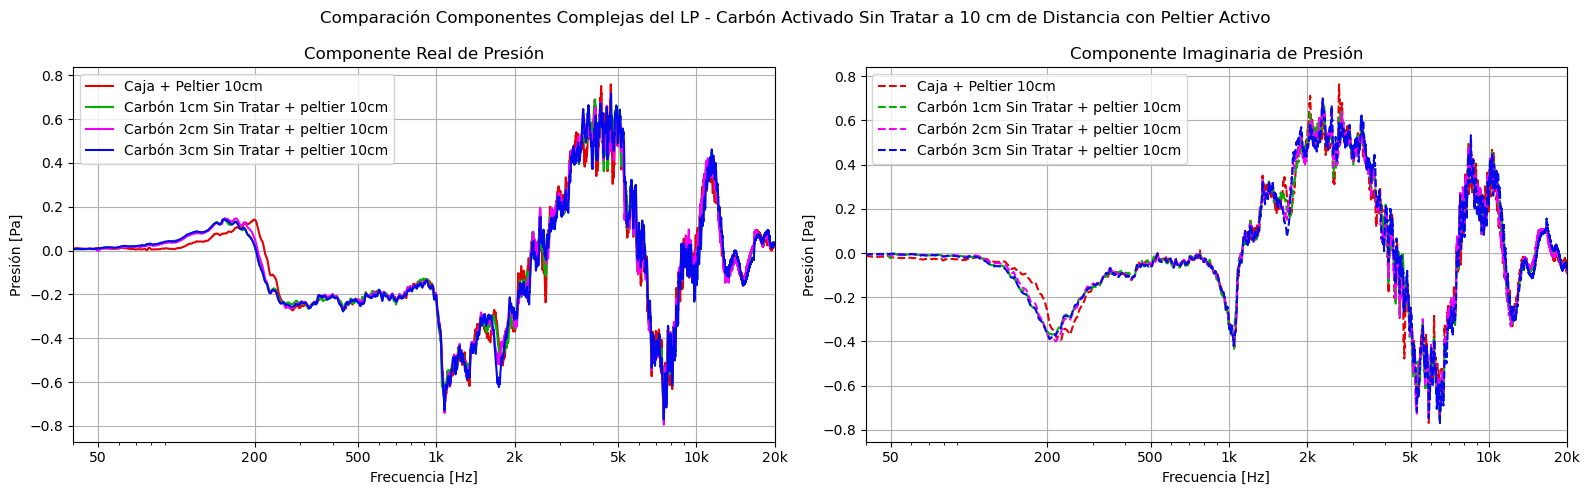

In [43]:
# Define colores por categoría
colores = {
    'Caja + Peltier 10cm': '#e30000', # rojo
    'Carbón 1cm Sin Tratar + peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Sin Tratar + peltier 10cm': "#f200ff",  # rosa 
    'Carbón 3cm Sin Tratar + peltier 10cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_10cm.txt',
        'Peltier_Carbon_SinTratar_1cm_Mic_10cm.txt',
        'Peltier_Carbon_SinTratar_2cm_Mic_10cm.txt',
        'Peltier_Carbon_SinTratar_3cm_Mic_10cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 10cm',
        'Carbón 1cm Sin Tratar + peltier 10cm',
        'Carbón 2cm Sin Tratar + peltier 10cm',
        'Carbón 3cm Sin Tratar + peltier 10cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Sin Tratar a 10 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Mic_10cm_peltier'
)

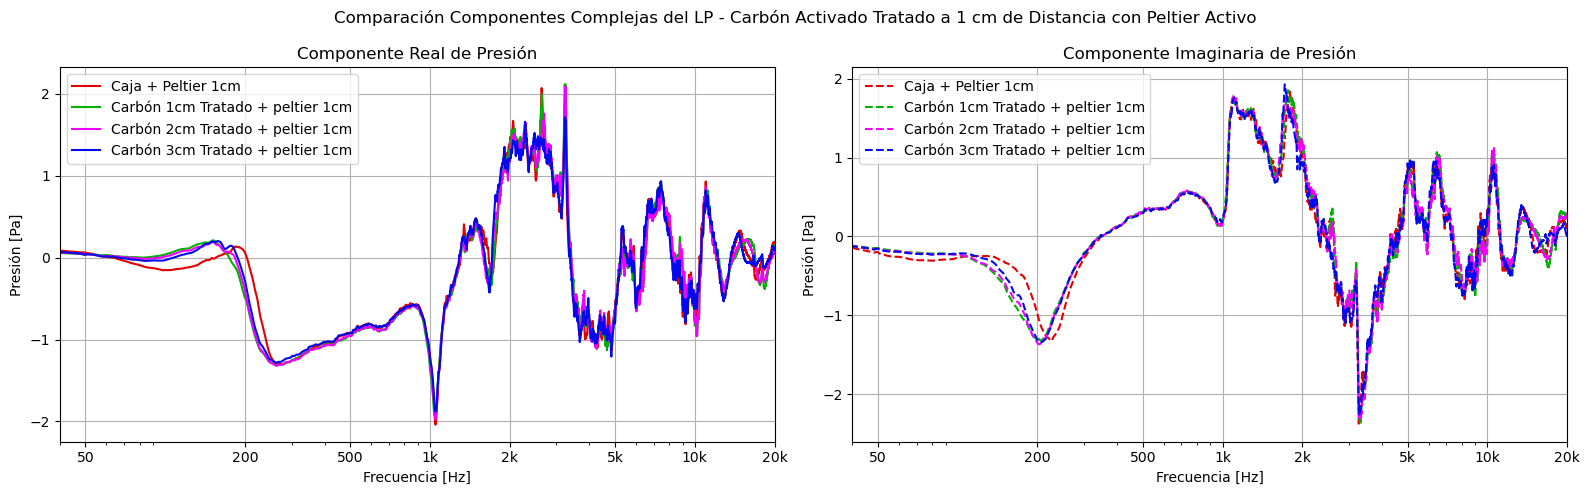

In [44]:
# Define colores por categoría
colores = {
    'Caja + Peltier 1cm': '#e30000', # rojo
    'Carbón 1cm Tratado + peltier 1cm': "#00b100",  # verde
    'Carbón 2cm Tratado + peltier 1cm': "#f200ff",  # rosa 
    'Carbón 3cm Tratado + peltier 1cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_1cm.txt',
        'Peltier_Carbon_Tratado_1cm_Mic_1cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_1cm.txt',
        'Peltier_Carbon_Tratado_3cm_Mic_1cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 1cm',
        'Carbón 1cm Tratado + peltier 1cm',
        'Carbón 2cm Tratado + peltier 1cm',
        'Carbón 3cm Tratado + peltier 1cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Tratado a 1 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Tratado_Mic_1cm_peltier'
)

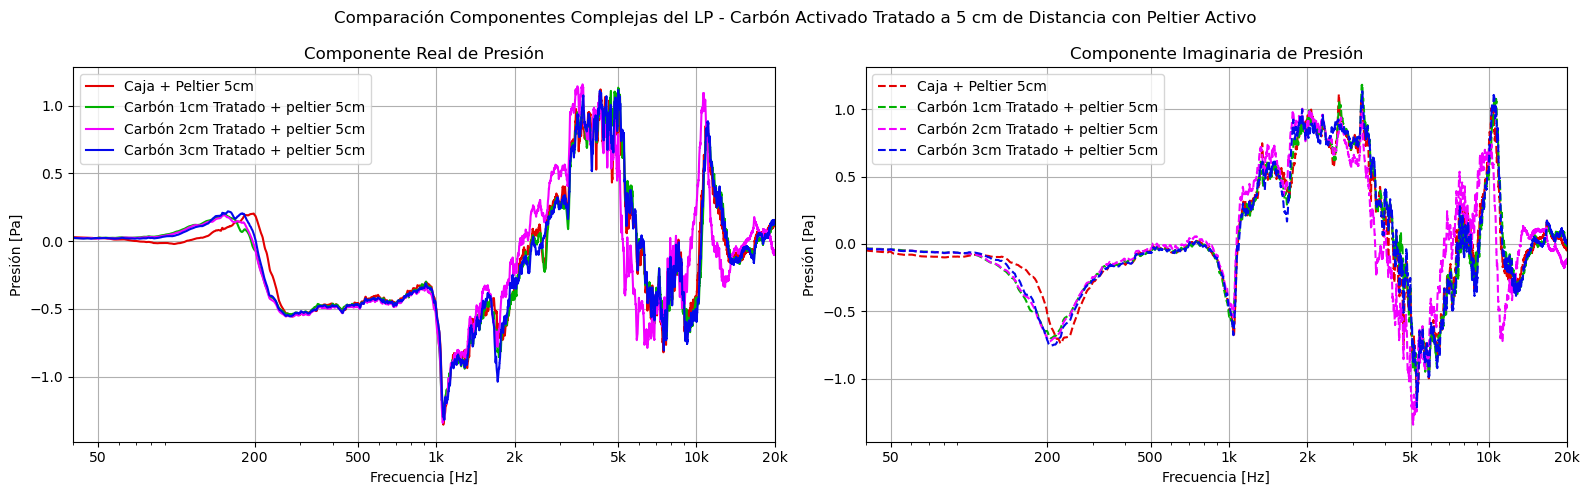

In [45]:
# Define colores por categoría
colores = {
    'Caja + Peltier 5cm': '#e30000', # rojo
    'Carbón 1cm Tratado + peltier 5cm': "#00b100",  # verde
    'Carbón 2cm Tratado + peltier 5cm': "#f200ff",  # rosa 
    'Carbón 3cm Tratado + peltier 5cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_5cm.txt',
        'Peltier_Carbon_Tratado_1cm_Mic_5cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_5cm.txt',
        'Peltier_Carbon_Tratado_3cm_Mic_5cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 5cm',
        'Carbón 1cm Tratado + peltier 5cm',
        'Carbón 2cm Tratado + peltier 5cm',
        'Carbón 3cm Tratado + peltier 5cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Tratado a 5 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Tratado_Mic_5cm_peltier'
)

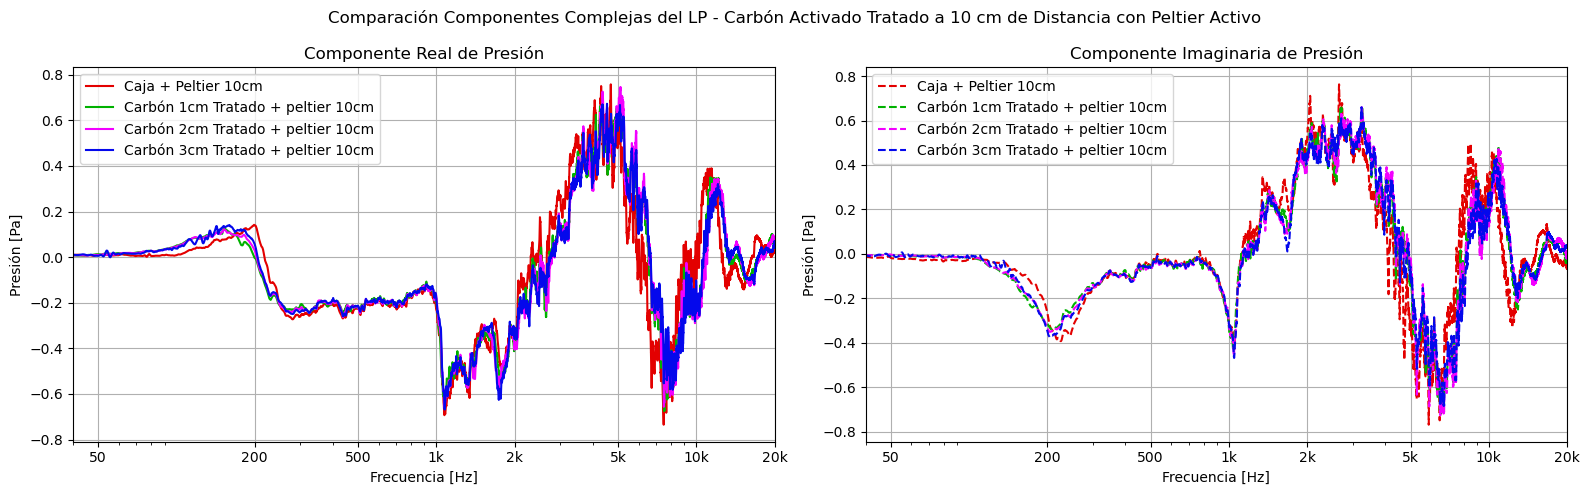

In [46]:
# Define colores por categoría
colores = {
    'Caja + Peltier 10cm': '#e30000', # rojo
    'Carbón 1cm Tratado + peltier 10cm': "#00b100",  # verde
    'Carbón 2cm Tratado + peltier 10cm': "#f200ff",  # rosa 
    'Carbón 3cm Tratado + peltier 10cm': "#0408ec",       # azul 
}

graficar_complejo_grupo(
    archivos=[
        'Peltier_Mic_10cm.txt',
        'Peltier_Carbon_Tratado_1cm_Mic_10cm.txt',
        'Peltier_Carbon_Tratado_2cm_Mic_10cm.txt',
        'Peltier_Carbon_Tratado_3cm_Mic_10cm.txt'
    ],
    etiquetas=[
        'Caja + Peltier 10cm',
        'Carbón 1cm Tratado + peltier 10cm',
        'Carbón 2cm Tratado + peltier 10cm',
        'Carbón 3cm Tratado + peltier 10cm'
    ],
    categorias_color=colores,
    titulo='Comparación Componentes Complejas del LP - Carbón Activado Tratado a 10 cm de Distancia con Peltier Activo',
    lim_x=(40,20000),
    #lim_y_real=(-50,110),
    #lim_y_imag=(-50,50),
    nombre_archivo='Presión_complejo_Tratado_Mic_10cm_peltier'
)